In [68]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from datetime import datetime
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

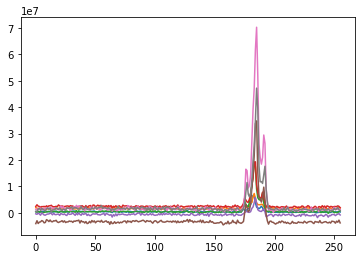

In [69]:

df = pd.read_csv("0329_1279.ascii", sep=" ")
df.columns.values[0:9] =["data no", "chan1","chan2","chan3","chan4","chan5","chan6","chan7","chan8" ]
df.drop(columns=['data no','1','0329+54'], inplace=True)
chan1=df['chan1']
chan2=df['chan2']
chan3=df['chan3']
chan4=df['chan4']
chan5=df['chan5']
chan6=df['chan6']
chan7=df['chan7']
chan8=df['chan8']
plt.plot(chan1)
plt.plot(chan2)
plt.plot(chan3)
plt.plot(chan4)
plt.plot(chan5)
plt.plot(chan6)
plt.plot(chan7)
plt.plot(chan8)


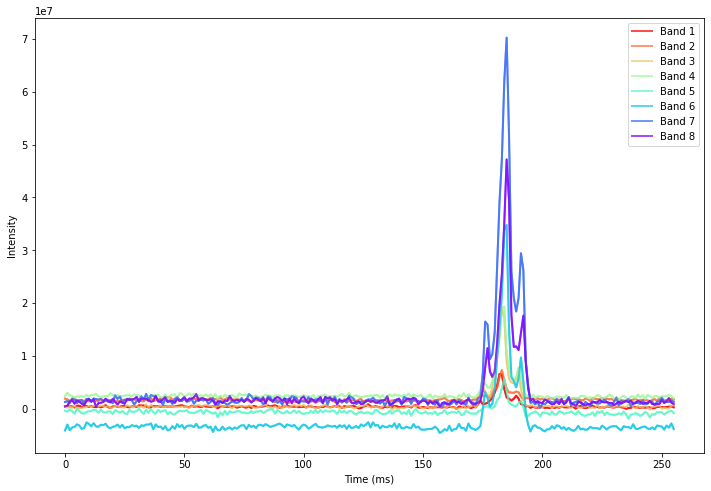

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("0329_1279.ascii", sep=" ")
df.columns.values[0:9] = ["data_no", "chan1", "chan2", "chan3", "chan4", "chan5", "chan6", "chan7", "chan8"]
df.drop(columns=['data_no', '1', '0329+54'], inplace=True)

colors = plt.cm.rainbow(np.linspace(1, 0, 8))

fig, ax = plt.subplots(figsize=(12, 8))

for i, col in enumerate(df.columns):
    if col != 'time_in_ms':
        ax.plot(df.index, df[col], label=f'Band {i + 1}', color=colors[i], linewidth=2, alpha=0.7)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Intensity')

ax.legend()

ax.set_prop_cycle(None)  
for i, col in enumerate(df.columns):
    if col != 'time_in_ms':
        ax.plot(df.index, df[col], label=f'Band {i + 1}', color=colors[i], linewidth=2, alpha=0.7)
plt.savefig("output_figure.pdf", dpi='figure')
plt.show()


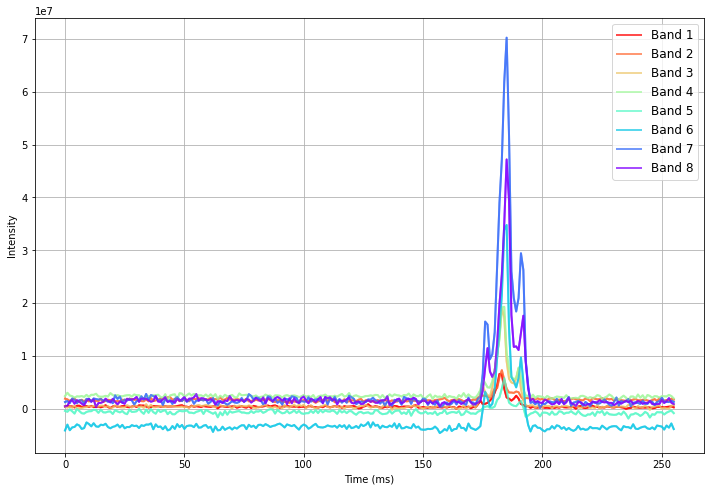

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("0329_1279.ascii", sep=" ")
df.columns.values[0:9] = ["data_no", "chan1", "chan2", "chan3", "chan4", "chan5", "chan6", "chan7", "chan8"]
df.drop(columns=['data_no', '1', '0329+54'], inplace=True)

colors = plt.cm.rainbow(np.linspace(1, 0, 8))

fig, ax = plt.subplots(figsize=(12, 8))

for i, col in enumerate(df.columns):
    if col != 'time_in_ms':
        ax.plot(df.index, df[col], label=f'Band {i + 1}', color=colors[i], linewidth=2, alpha=0.7)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Intensity')

ax.grid(True)

legend = ax.legend(fontsize='large')  

ax.set_prop_cycle(None) 
for i, col in enumerate(df.columns):
    if col != 'time_in_ms':
        ax.plot(df.index, df[col], label=f'Band {i + 1}', color=colors[i], linewidth=2, alpha=0.7)

plt.savefig("output_figure.pdf", dpi=300, bbox_inches='tight')  
plt.show()


(-4553027.0, 4100000.0)

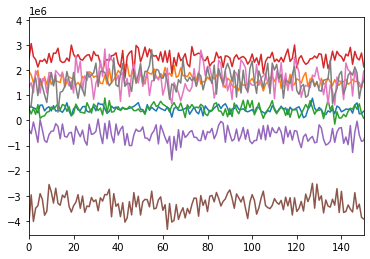

In [72]:
plt.plot(chan1)
plt.plot(chan2)
plt.plot(chan3)
plt.plot(chan4)
plt.plot(chan5)
plt.plot(chan6)
plt.plot(chan7)
plt.plot(chan8)
plt.xlim([0,150])
plt.ylim([min(chan6),0.41e7])


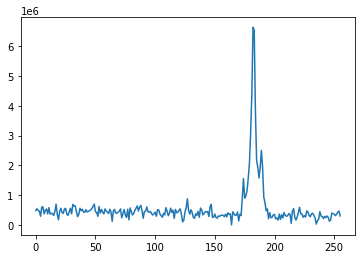

In [73]:
plt.plot(chan1)

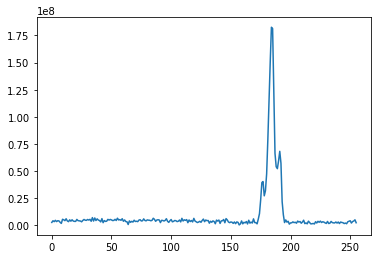

In [74]:
integrated_profile = chan1 +chan2+chan3+chan4+chan5+chan6+chan7+chan8
plt.plot(integrated_profile )

714.46 ms

In [75]:
tchn = 714.46/256

In [76]:
tchn

2.790859375

each sub band/channel corresponds to 2.790859375 ms

The final step was dividing the folded profile into eight frequency bands, again
saving each band in 256 channels. The bandpass of the measurement had a total
bandwidth of 98.4 MHz and an upper frequency limit of 1430.391 MHz. Thus each
sub-band has a bandwidth of 98.4 MHz/8 = 12.3 MHz.

In [77]:
nus = []
for i in range(0,8):
    nusn = 1430.391 - (i-0.5)*12.3
    nus.append(nusn)

In [78]:
nus

[1436.5410000000002,
 1424.241,
 1411.941,
 1399.641,
 1387.3410000000001,
 1375.0410000000002,
 1362.741,
 1350.441]

^plot this with the bands to show separation

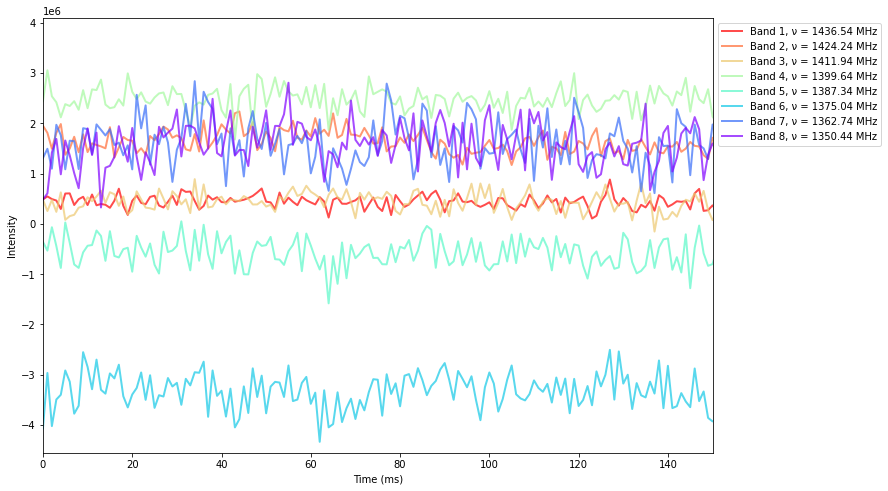

In [79]:
import matplotlib.pyplot as plt

legend_labels = []
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(1, 0, 8)) 
for i in range(8):
    nu = 1430.391 - (i-0.5) * 12.3
    label = f'Band {i + 1}, ν = {nu:.2f} MHz'
    legend_labels.append(label)
    plt.plot(eval(f'chan{i + 1}'), label=label, color=colors[i], linewidth=2, alpha=0.7)
plt.xlim([0, 150])
plt.ylim([min(chan6), 0.41e7])

plt.xlabel('Time (ms)')
plt.ylabel('Intensity')


plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig("output_figure_cut.pdf", bbox_inches='tight')

plt.show()


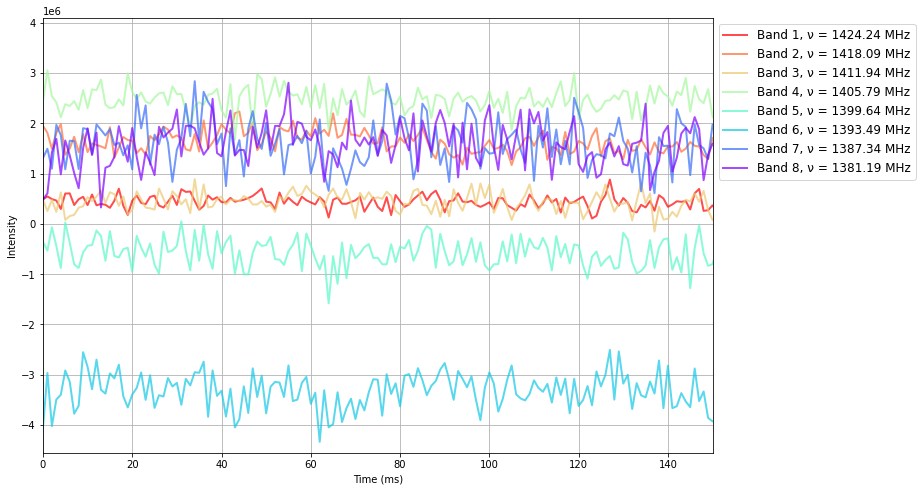

In [80]:
import matplotlib.pyplot as plt
import numpy as np


legend_labels = []
plt.figure(figsize=(12, 8))

colors = plt.cm.rainbow(np.linspace(1, 0, 8))
for i in range(8):
    nu = 1430.391 - ((i +1)/2) * 12.3
    label = f'Band {i + 1}, ν = {nu:.2f} MHz'
    legend_labels.append(label)
    plt.plot(eval(f'chan{i + 1}'), label=label, color=colors[i], linewidth=2, alpha=0.7)
plt.xlim([0, 150])
plt.ylim([min(chan6), 0.41e7])

plt.xlabel('Time (ms)')
plt.ylabel('Intensity')

plt.grid(True)

legend = plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize='large')

plt.savefig("output_figure_cut.pdf", bbox_inches='tight', dpi=300)

plt.show()


In [81]:
from scipy.optimize import curve_fit

In [82]:
def gaussian(x, A, mu, sigma, background):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + background


In [83]:
channel_names = ['chan1', 'chan2', 'chan3', 'chan4', 'chan5', 'chan6', 'chan7', 'chan8']
fits = []
mu = []
for channel_name in channel_names:
    channel_data = df[channel_name]
    x = np.arange(len(channel_data))
    initial = [max(channel_data), np.argmax(channel_data), 1.0, 0.0]
    popt, _ = curve_fit(gaussian, x, channel_data, p0=initial)
    fits.append(popt)
    mu.append(popt[1])
    

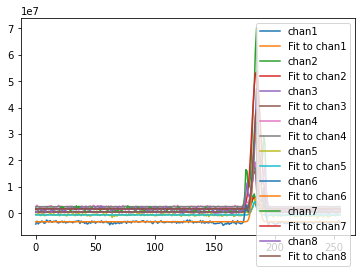

In [84]:
for i, channel_name in enumerate(channel_names):
    channel_data = df[channel_name]
    x = np.arange(len(channel_data))
    plt.plot(x, channel_data, label=f'{channel_name}')
    plt.plot(x, gaussian(x, *fits[i]), label=f'Fit to {channel_name}')
    plt.legend()
plt.show()


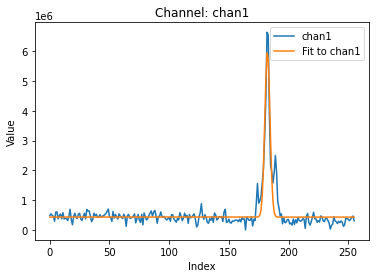

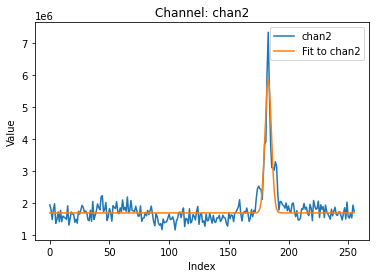

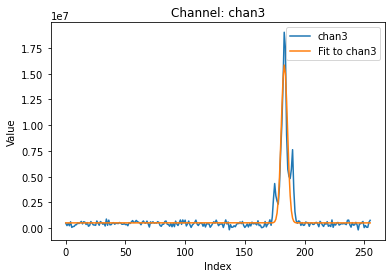

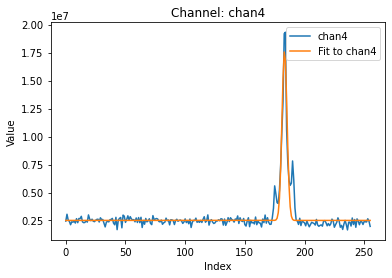

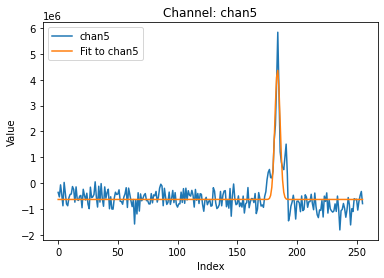

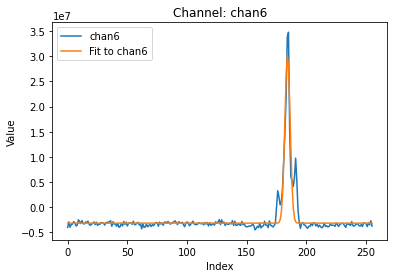

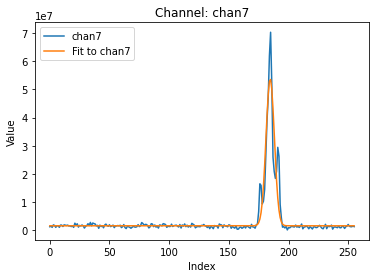

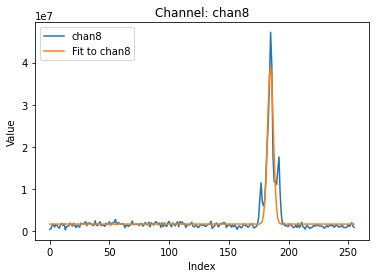

In [85]:

for i, channel_name in enumerate(channel_names):
    channel_data = df[channel_name]
    x = np.arange(len(channel_data))
    plt.figure()
    plt.plot(x, channel_data, label=f'{channel_name}')
    plt.plot(x, gaussian(x, *fits[i]), label=f'Fit to {channel_name}')
    plt.legend()
    plt.title(f'Channel: {channel_name}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

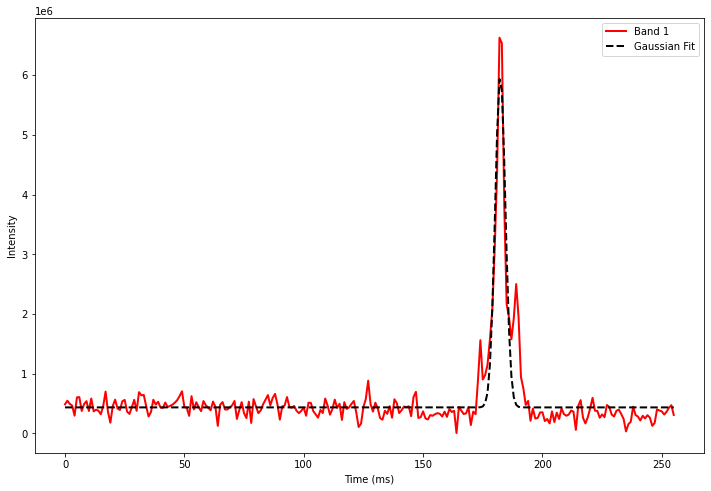

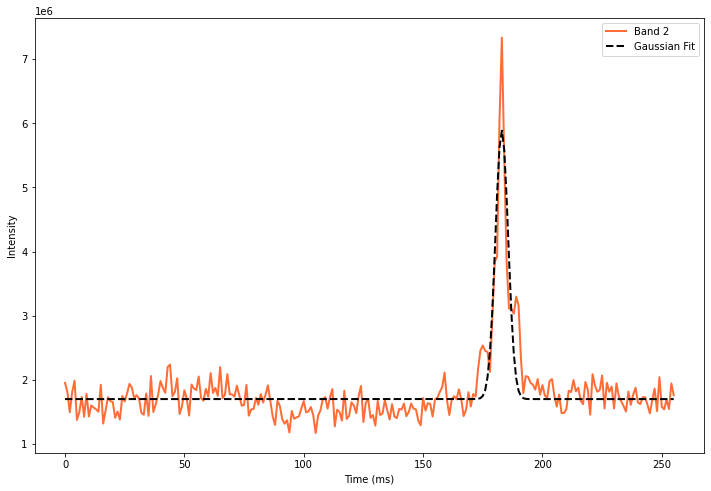

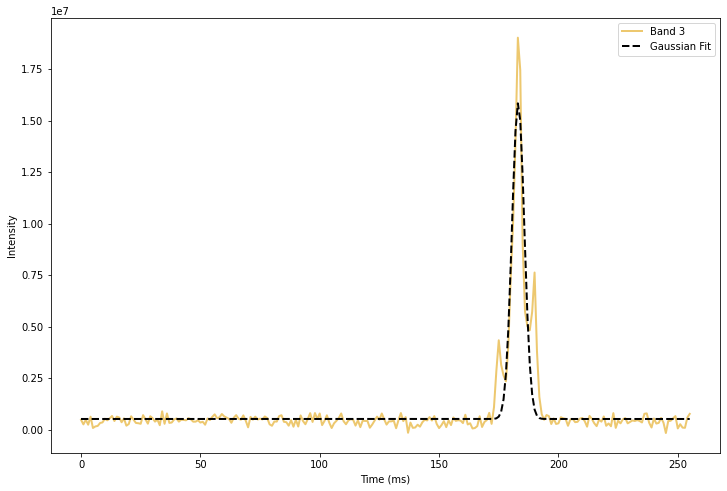

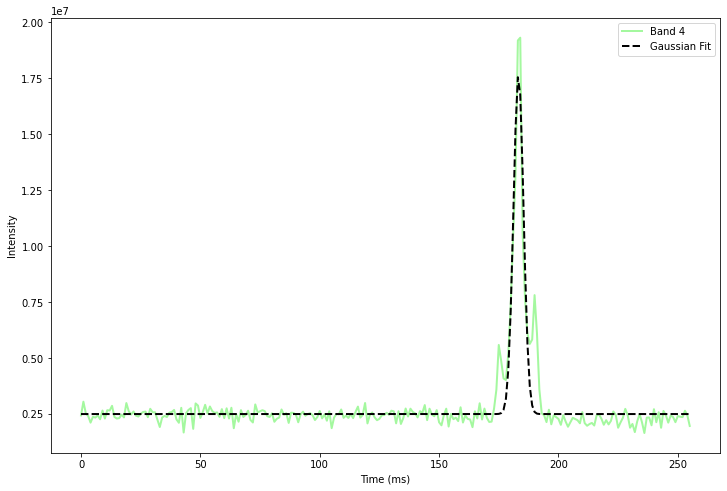

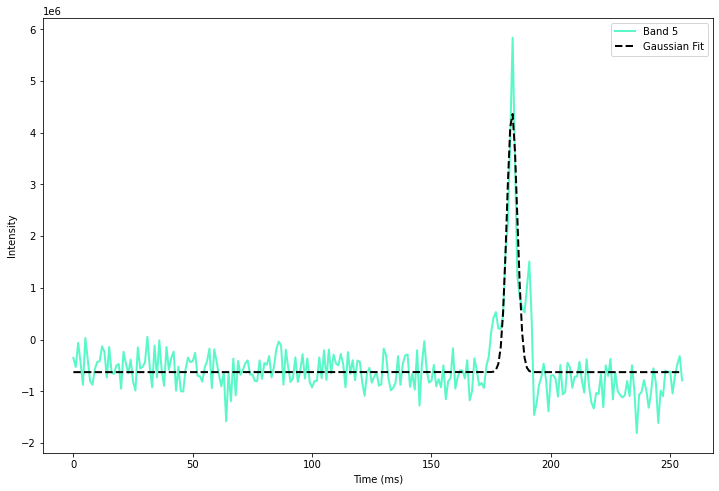

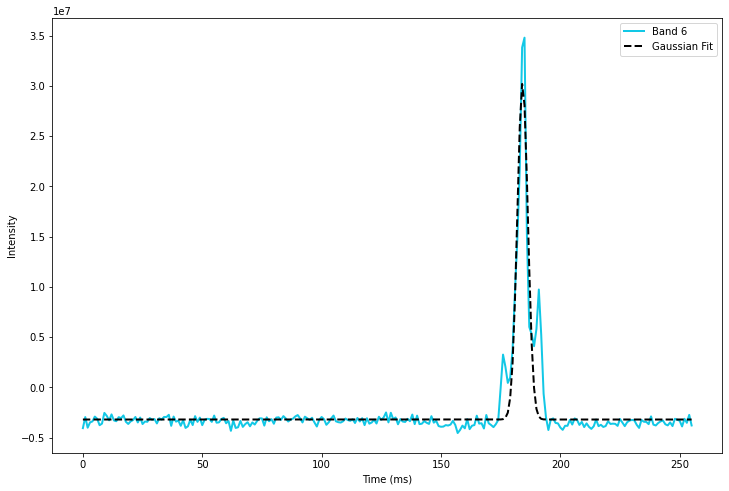

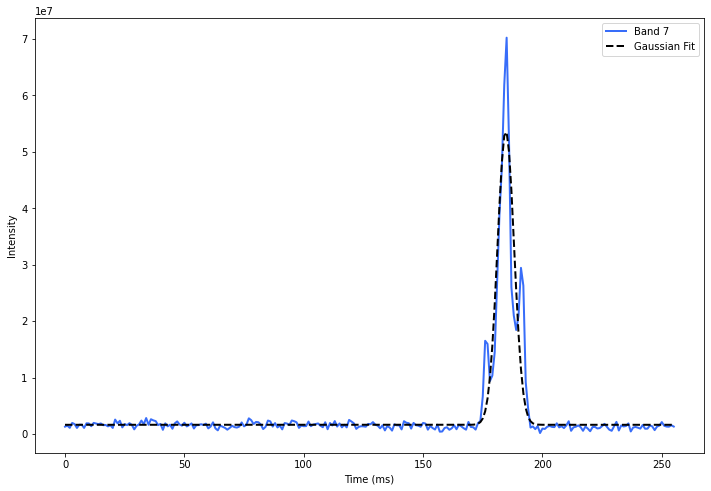

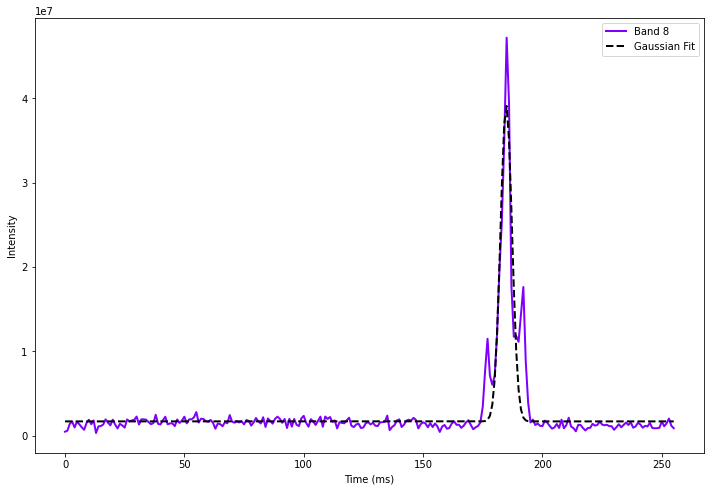

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma, background):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + background

channel_names = ['chan1', 'chan2', 'chan3', 'chan4', 'chan5', 'chan6', 'chan7', 'chan8']
fits = []
mu = []

colors = plt.cm.rainbow(np.linspace(0, 1, len(channel_names)))[::-1]

for i, channel_name in enumerate(channel_names):
    channel_data = df[channel_name]
    x = np.arange(len(channel_data))
    
    initial = [max(channel_data), np.argmax(channel_data), 1.0, 0.0]
    popt, _ = curve_fit(gaussian, x, channel_data, p0=initial)
    fits.append(popt)
    mu.append(popt[1])
    plt.figure(figsize=(12, 8))
    
    plt.plot(x, channel_data, label=f'Band {i + 1}', color=colors[i], linewidth=2)

    plt.plot(x, gaussian(x, *popt), linestyle='--', color='black', linewidth=2)

    plt.xlabel('Time (ms)')
    plt.ylabel('Intensity')

    plt.legend([f'Band {i + 1}', 'Gaussian Fit'], loc='upper right')
    plt.savefig(f'gaussianfit{i + 1}.pdf')

    plt.show()


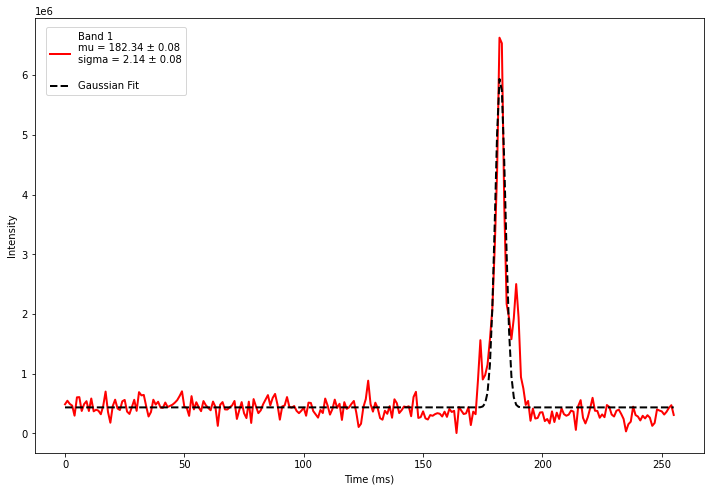

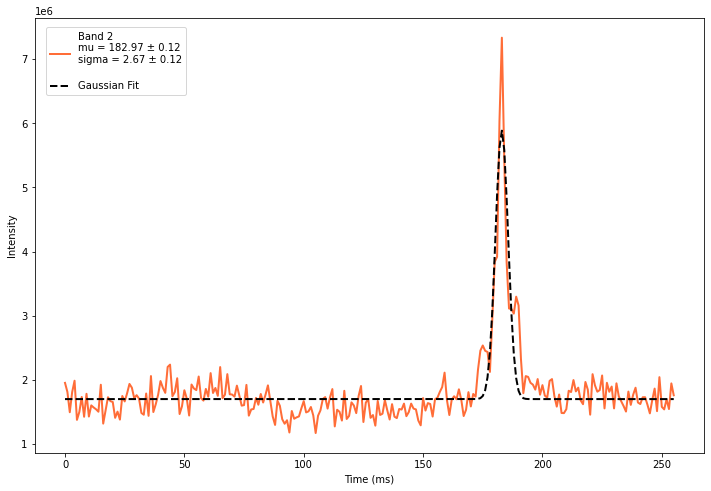

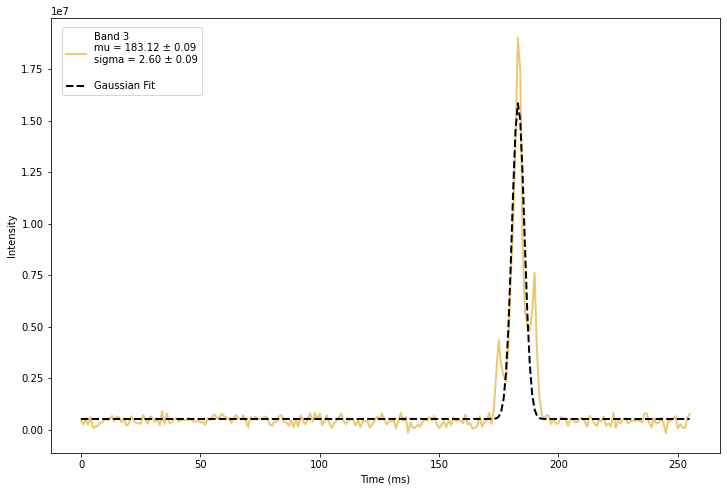

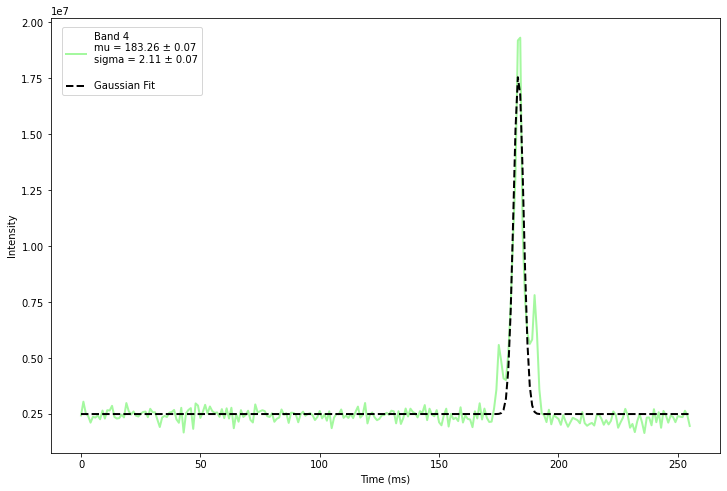

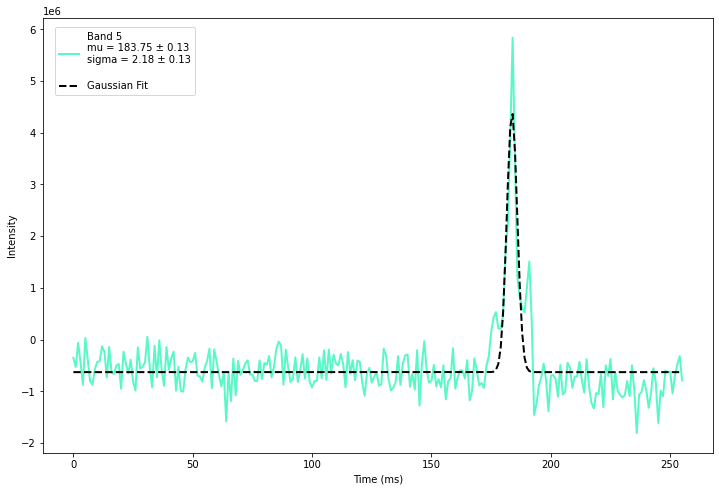

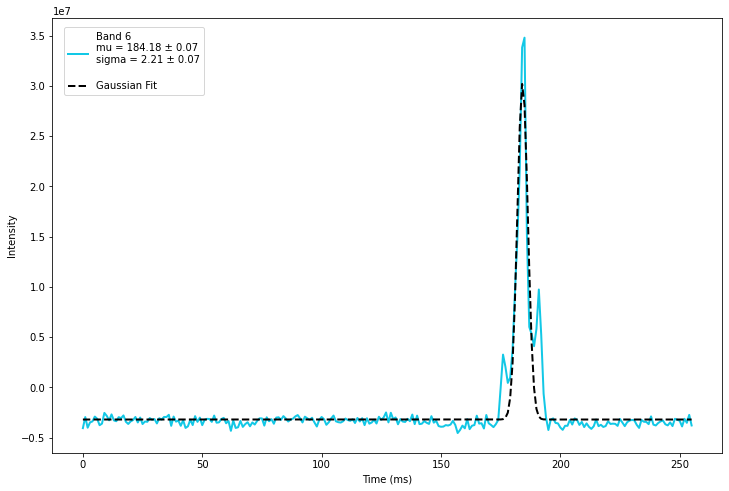

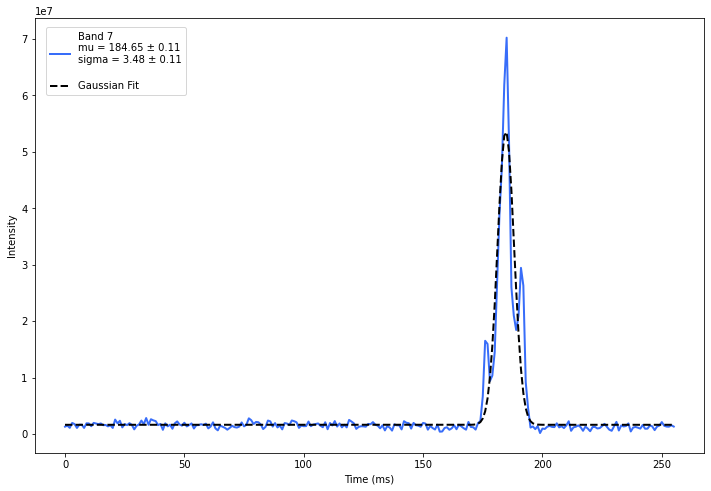

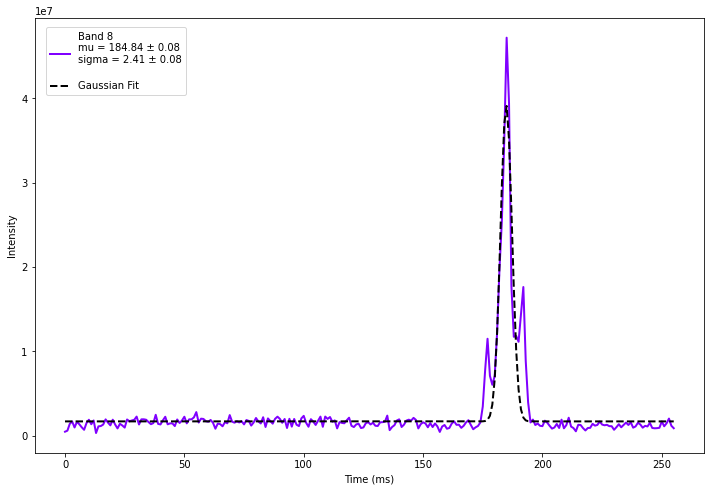

Band 1: mu = 182.34, mu error = 0.08
Band 2: mu = 182.97, mu error = 0.12
Band 3: mu = 183.12, mu error = 0.09
Band 4: mu = 183.26, mu error = 0.07
Band 5: mu = 183.75, mu error = 0.13
Band 6: mu = 184.18, mu error = 0.07
Band 7: mu = 184.65, mu error = 0.11
Band 8: mu = 184.84, mu error = 0.08


In [104]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma, background):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + background

channel_names = ['chan1', 'chan2', 'chan3', 'chan4', 'chan5', 'chan6', 'chan7', 'chan8']
fits = []
mu = []
errors = []  
colors = plt.cm.rainbow(np.linspace(0, 1, len(channel_names)))[::-1]

for i, channel_name in enumerate(channel_names):
    channel_data = df[channel_name]
    x = np.arange(len(channel_data))
    
    initial = [max(channel_data), np.argmax(channel_data), 1.0, 0.0]
    popt, pcov = curve_fit(gaussian, x, channel_data, p0=initial)
    fits.append(popt)
    mu.append(popt[1])
    
    errors.append(np.sqrt(np.diag(pcov)))
    
    plt.figure(figsize=(12, 8))
    
    plt.plot(x, channel_data, label=f'Band {i + 1}', color=colors[i], linewidth=2)
    
    plt.plot(x, gaussian(x, *popt), linestyle='--', color='black', linewidth=2)

    plt.xlabel('Time (ms)')
    plt.ylabel('Intensity')

    legend_label = f'Band {i + 1}\n' \
                   f'mu = {popt[1]:.2f} ± {errors[i][1]:.2f}\n' \
                   f'sigma = {popt[2]:.2f} ± {errors[i][2]:.2f}\n' 
    
    plt.legend([legend_label, 'Gaussian Fit'], loc='upper left', bbox_to_anchor=(0.01, 0.99))
    plt.savefig(f'gaussianfit{i + 1}.pdf')

    plt.show()

for i in range(len(mu)):
    print(f'Band {i + 1}: mu = {mu[i]:.2f}, mu error = {errors[i][1]:.2f}')


In [87]:
mu

[182.3365944610669,
 182.96846230143714,
 183.12416352960847,
 183.26195139331125,
 183.75058001731873,
 184.1794984379677,
 184.6514180536823,
 184.83944967299973]

In [88]:
nus

[1436.5410000000002,
 1424.241,
 1411.941,
 1399.641,
 1387.3410000000001,
 1375.0410000000002,
 1362.741,
 1350.441]

In [89]:
nusghz = []
for i in nus:
    nusghz.append(i*0.001)

In [90]:
nusghz

[1.4365410000000003,
 1.424241,
 1.4119410000000001,
 1.3996410000000001,
 1.3873410000000002,
 1.3750410000000002,
 1.362741,
 1.350441]

In [91]:
nusdiff = (1/(nusghz[7])**2)-(1/(nusghz[0])**2)

In [92]:
nusdiff

0.06376025338777097

In [112]:
ts=[]
for i in mu:
    ts += [i*tchn]

In [113]:
ts

[508.8757940572417,
 510.6392483432999,
 511.0737885756409,
 511.458335126817,
 512.8220289030216,
 514.0190798984,
 515.3361411821635,
 515.860910989732]

In [111]:

ts = [mu_val * tchn for mu_val in mu]

ts_errors = [tchn * error[1] for error in errors]

for i in range(len(ts)):
    print(f'Band {i + 1}: ts = {ts[i]:.2f}, ts error = {ts_errors[i]:.2f}')



Band 1: ts = 508.88, ts error = 0.21
Band 2: ts = 510.64, ts error = 0.34
Band 3: ts = 511.07, ts error = 0.24
Band 4: ts = 511.46, ts error = 0.19
Band 5: ts = 512.82, ts error = 0.36
Band 6: ts = 514.02, ts error = 0.20
Band 7: ts = 515.34, ts error = 0.30
Band 8: ts = 515.86, ts error = 0.23


in ms

In [94]:
ts

[508.8757940572417,
 510.6392483432999,
 511.0737885756409,
 511.458335126817,
 512.8220289030216,
 514.0190798984,
 515.3361411821635,
 515.860910989732]

In [95]:
tdiff = ts[7]-ts[0]

In [96]:
print(tdiff, "ms")

6.985116932490314 ms


In [114]:

tdiff = ts[7] - ts[0]

ts_error_7 = ts_errors[7]  
ts_error_0 = ts_errors[0]  

tdiff_error = np.sqrt(ts_error_7**2 + ts_error_0**2)

print(f'tdiff = {tdiff:.2f} ms')
print(f'tdiff error = {tdiff_error:.2f} ms')


tdiff = 6.99 ms
tdiff error = 0.31 ms


In [97]:
c = 1/4.149

In [98]:
c

0.24102193299590263

In [99]:
DM = tdiff*c*(1/nusdiff)

In [100]:
DM

26.404637620121637

In [116]:

DM = tdiff * c * (1 / nusdiff)

sigma_tdiff_over_tdiff = tdiff_error / tdiff
sigma_nusghz_7_over_nusghz_7 = ts_errors[7] / nusghz[7]
sigma_nusghz_0_over_nusghz_0 = ts_errors[0] / nusghz[0]

sigma_DM = abs(DM) * np.sqrt(sigma_tdiff_over_tdiff**2 + sigma_nusghz_7_over_nusghz_7**2 + sigma_nusghz_0_over_nusghz_0**2)

print(f'DM = {DM:.2f}')
print(f'Error in DM = {sigma_DM:.2f}')


DM = 26.40
Error in DM = 6.09


In [101]:
DM/0.028415

929.2499602365524

In [117]:
DM/0.02217

1191.0075606730554

In [118]:
y = 0.02217

result = DM / y

sigma_result = abs(result) * np.sqrt((sigma_DM / DM)**2 + (0 / y)**2)

print(f'Result: {result:.2f}')
print(f'Error in Result: {sigma_result:.2f}')


Result: 1191.01
Error in Result: 274.49
